# Librerías

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
import warnings 

warnings.filterwarnings('ignore')

# Funciones auxiliares

In [57]:
def box_plot_metricas(results_louv, col, rot = False):
    fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize = (20,5))

    sns.boxplot(x=col, y="acc", data=results_louv, color='lightblue', ax = axes[0]).set(
        ylim = (0,1), title = f'Accuracy por {col}'
        )

    sns.boxplot(x=col, y="nmi", data=results_louv, color='lightsalmon', ax = axes[1]).set(
        ylim = (0,1), title = f'NMI por {col}'
        )

    sns.boxplot(x=col, y="ari", data=results_louv, color='plum', ax = axes[2]).set(
        ylim = (0,1), title = f'ARI por {col}'
        )

    if rot: 
        for ax in axes:
            ax.tick_params(axis='x', rotation=90)

In [88]:
def bar_plot_metricas(results_louv, rot = False):
    fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,7), sharex=True)

    sns.barplot(results_louv, x = 'grafo_medida', y = 'acc', color = 'lightblue', ax = axes[0]).set(
        ylim = (0,1), title = 'Accuracy'
    )
    sns.barplot(results_louv, x = 'grafo_medida', y = 'nmi', color = 'lightsalmon', ax = axes[1]).set(
        ylim = (0,1), title = 'NMI'
    )
    sns.barplot(results_louv, x = 'grafo_medida', y = 'ari', color = 'plum', ax = axes[2]).set(
        ylim = (0,1), title = 'ARI'
    )
  
    if rot: 
        for ax in axes:
            ax.tick_params(axis='x', rotation=90)

# Lectura de datos

In [96]:
# Lectura de datos
results_louv = pd.read_csv('resultados_louvain.csv')
results_bet = pd.read_csv('resultados_betweeness.csv')

columnas_metricas = ['acc', 'nmi', 'ari', 'sil', 'chs', 'dbs']

results_louv['grafo'] = results_louv['name'].apply(lambda x: x.split('_graph')[0])
results_louv['medida'] = results_louv['name'].apply(lambda x: (x.split('_graph_')[1]).split('_th')[0])
results_louv['umbral'] = results_louv['name'].apply(lambda x: x.split('th_')[1])

results_louv.drop(columns = 'name', inplace = True)

results_louv = results_louv[['dataset', 'grafo', 'medida', 'umbral', 'algorithm'] + columnas_metricas]


results_bet['grafo'] = results_bet['name'].apply(lambda x: x.split('_graph')[0])
results_bet['medida'] = results_bet['name'].apply(lambda x: (x.split('_graph_')[1]).split('_th')[0])
results_bet['umbral'] = results_bet['name'].apply(lambda x: x.split('th_')[1])

results_bet.drop(columns = 'name', inplace = True)

results_bet = results_bet[['dataset', 'grafo', 'medida', 'umbral', 'algorithm'] + columnas_metricas]

In [93]:
# Filtro de 10XPBMC
results_louv = results_louv[results_louv.dataset != '10X_PBMC_select_2100']

In [25]:
results_louv.head()

,dataset,grafo,medida,umbral,algorithm,acc,nmi,ari,sil,chs,dbs
0,symsim_1000_400_5,complete,cosenos,0.4,Louvain,0.282,0.018,0.011,0.01375,8.29583,6.32472
1,symsim_1000_400_5,knn,tfidf_cosine,0.4,Louvain,0.450,0.567,0.348,-0.02245,55.37815,3.44656
2,symsim_1000_400_5,complete,euclideana,0,Louvain,0.695,0.794,0.659,0.29369,188.18608,1.11310
3,symsim_1000_400_5,kmst,correlaciones,0.1,Louvain,0.930,0.865,0.840,0.12251,100.47819,3.51121
4,symsim_1000_400_5,kmst,tfidf_cosine,0.4,Louvain,0.770,0.872,0.728,0.16144,99.70299,1.30112


# Métricas agrupadas - Datos simulados

In [61]:
results_louv_sim = results_louv[results_louv.dataset != 'HumanLiver_counts_top5000']

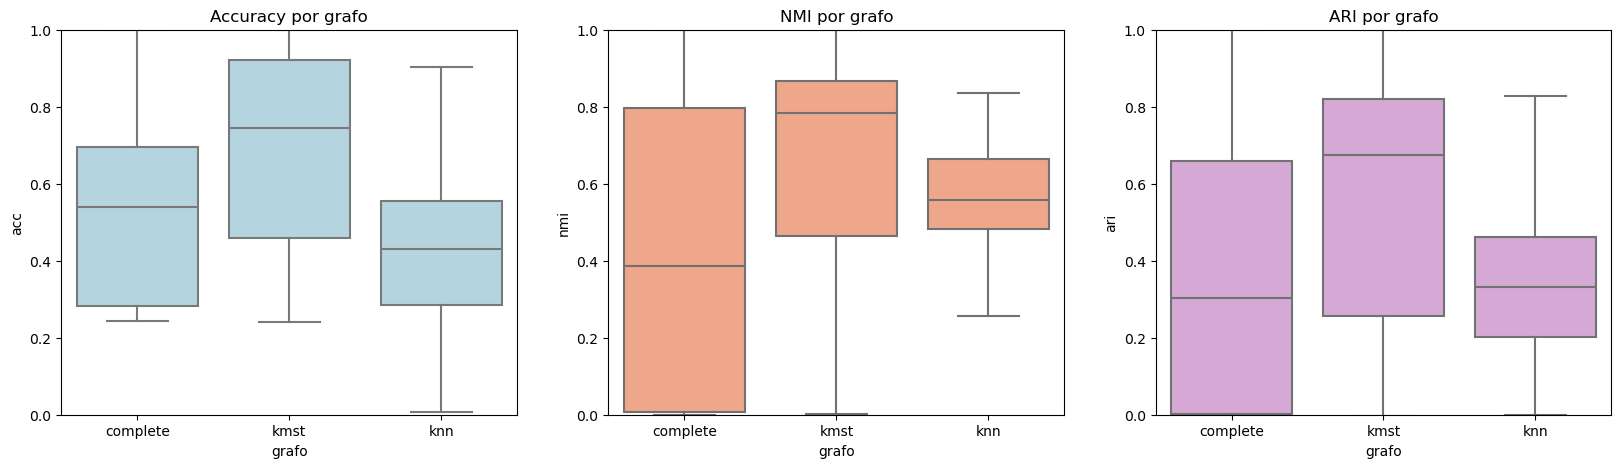

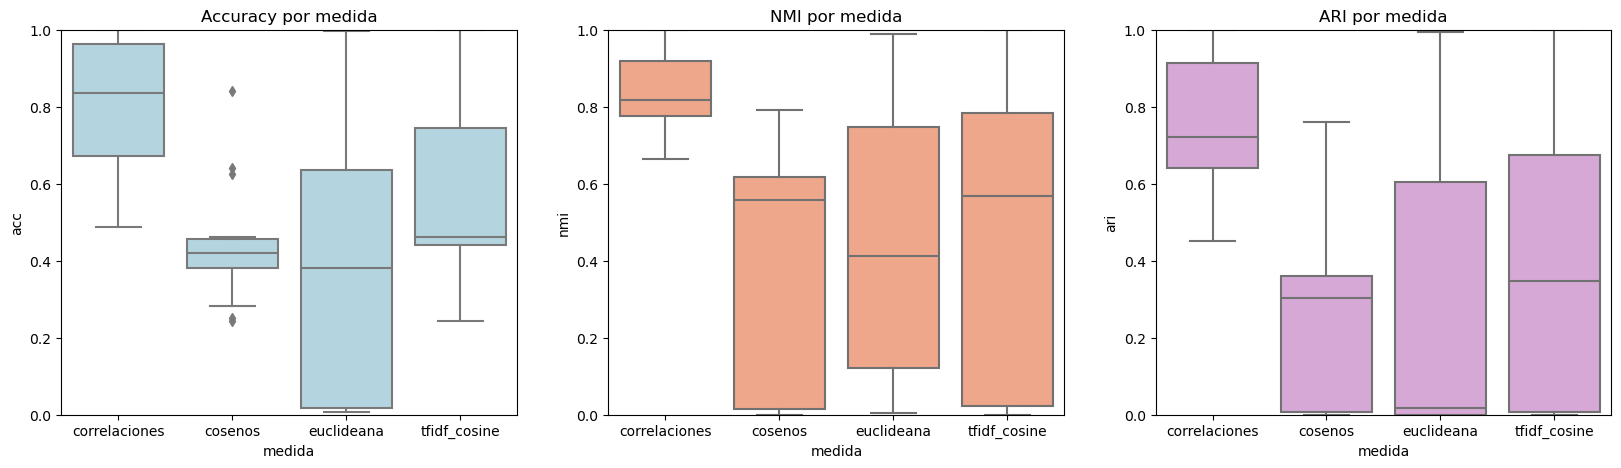

In [73]:
box_plot_metricas(results_louv_sim.sort_values('grafo'), "grafo")
box_plot_metricas(results_louv_sim.sort_values('medida'), "medida")

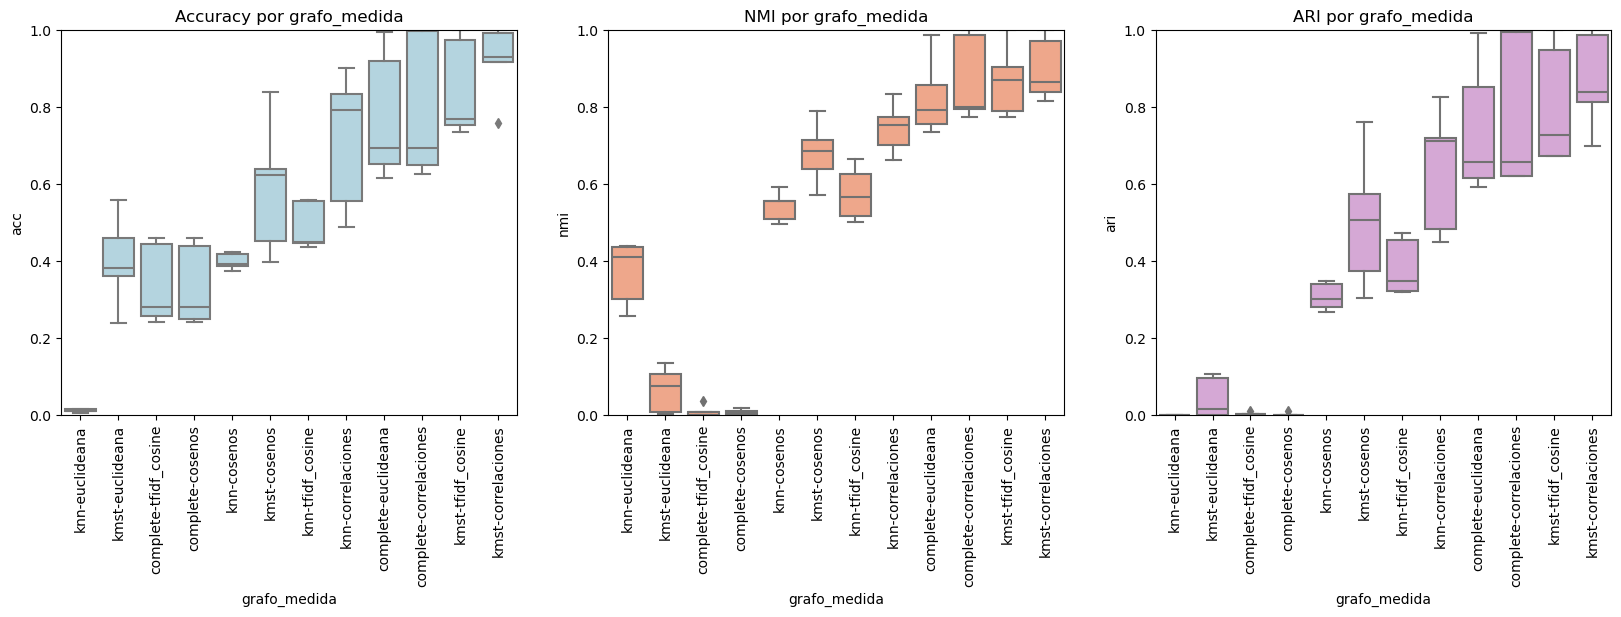

In [78]:
results_louv_sim['grafo_medida'] = results_louv_sim['grafo'] + '-' + results_louv_sim['medida'] 
results_louv_sim = results_louv_sim.sort_values('acc')
box_plot_metricas(results_louv_sim, "grafo_medida", True)

# Human Liver

In [66]:
results_louv_hl = results_louv[results_louv.dataset == 'HumanLiver_counts_top5000']

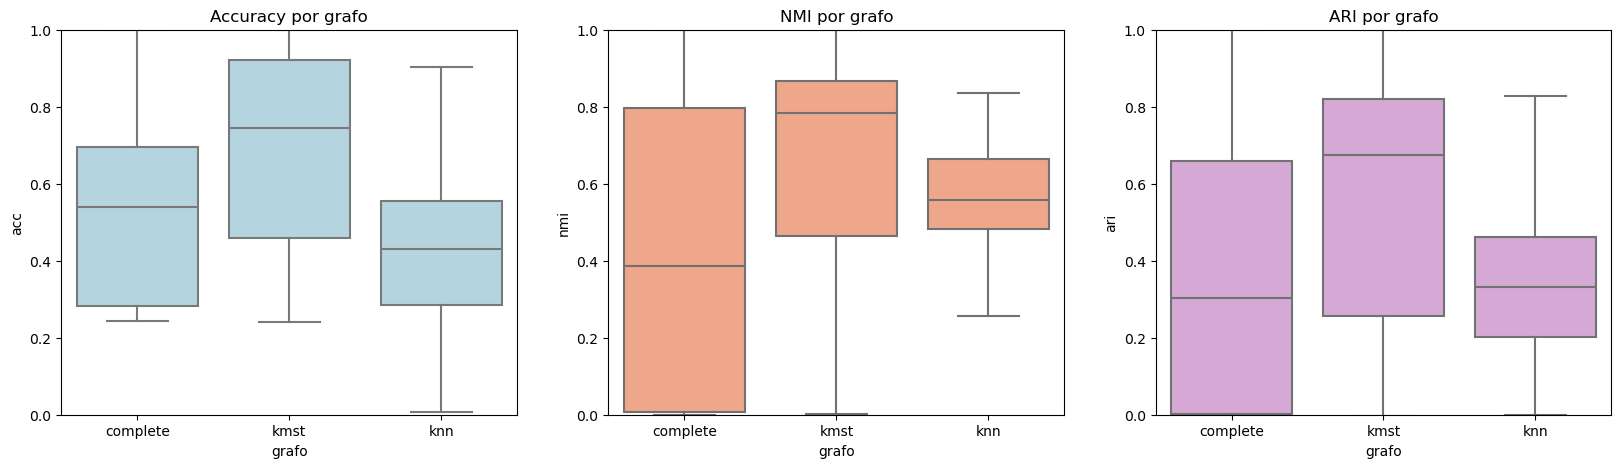

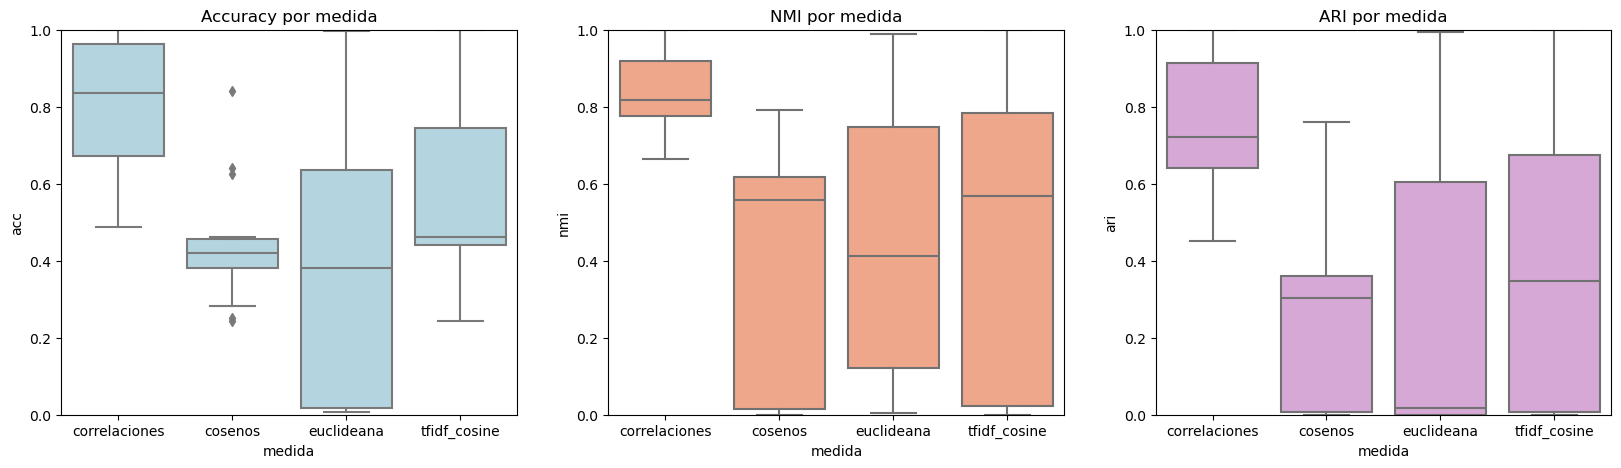

In [72]:
box_plot_metricas(results_louv_sim.sort_values('grafo'), "grafo")
box_plot_metricas(results_louv_sim.sort_values('medida'), "medida")

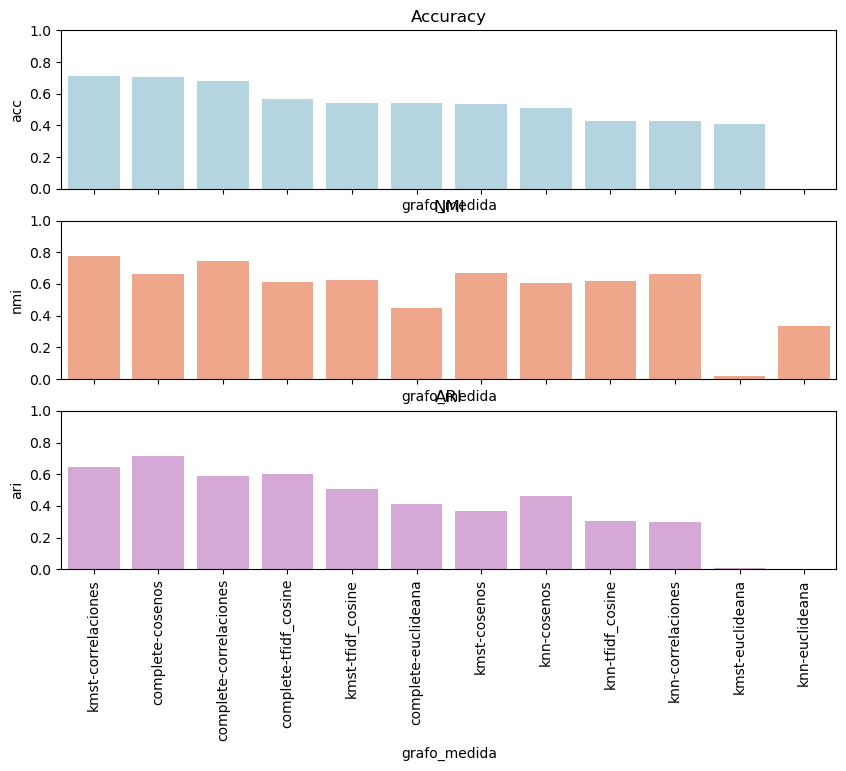

In [89]:
results_louv_hl['grafo_medida'] = results_louv_hl['grafo'] + '-' + results_louv_hl['medida'] 
results_louv_hl = results_louv_hl.sort_values('acc', ascending=False)

bar_plot_metricas(results_louv_hl, True)

# Betweenness

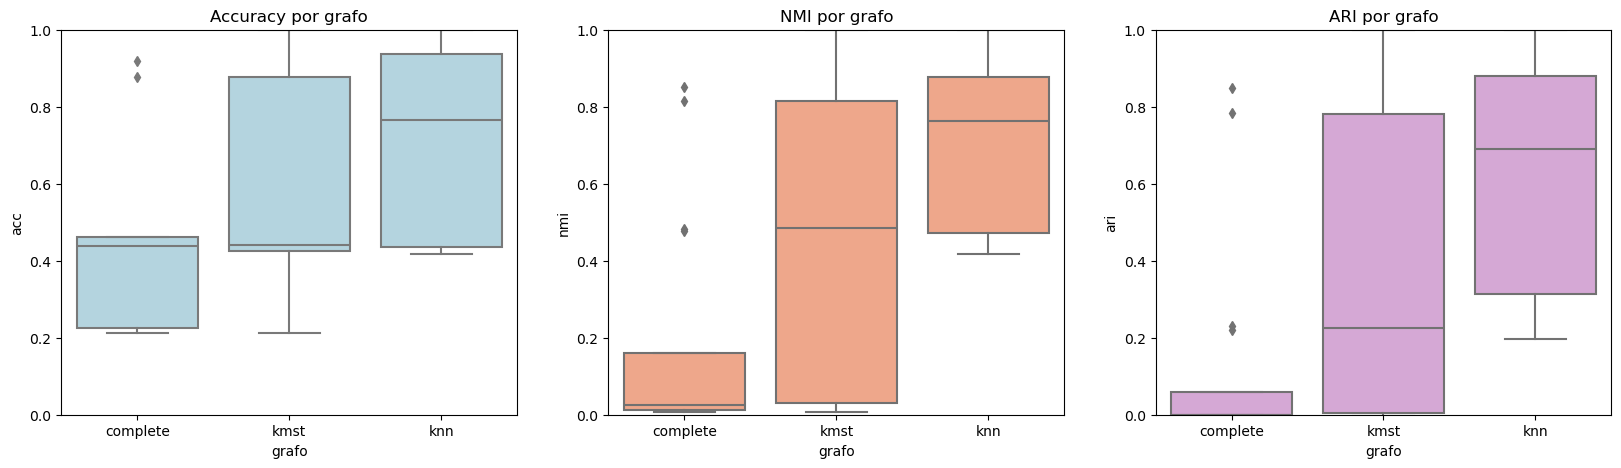

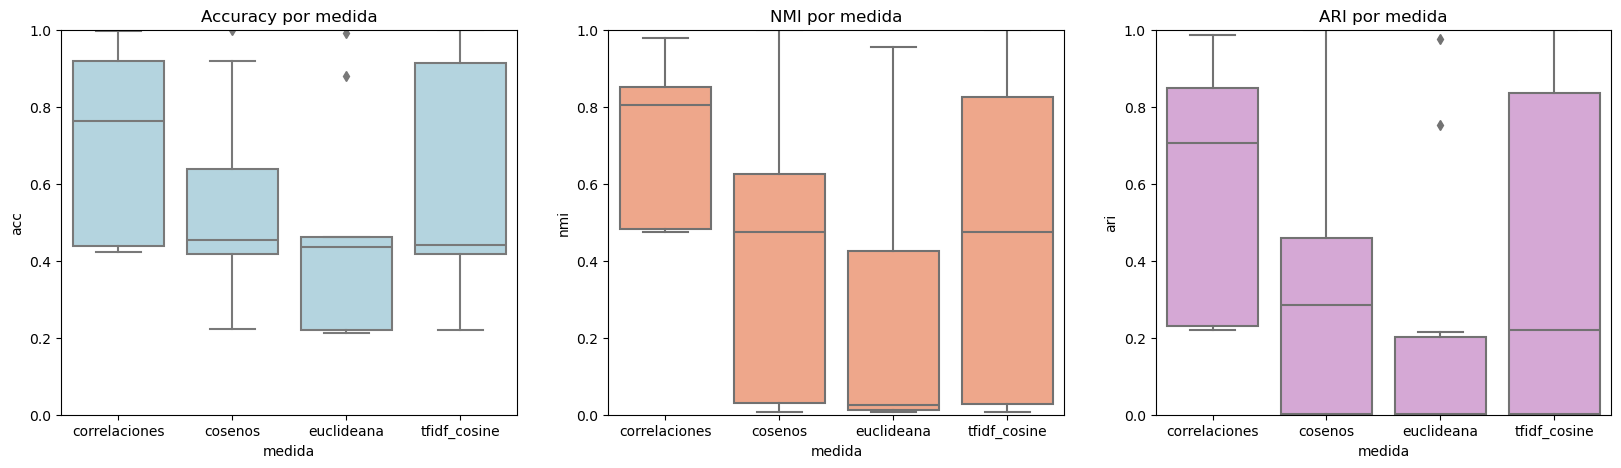

In [97]:
box_plot_metricas(results_bet.sort_values('grafo'), "grafo")
box_plot_metricas(results_bet.sort_values('medida'), "medida")

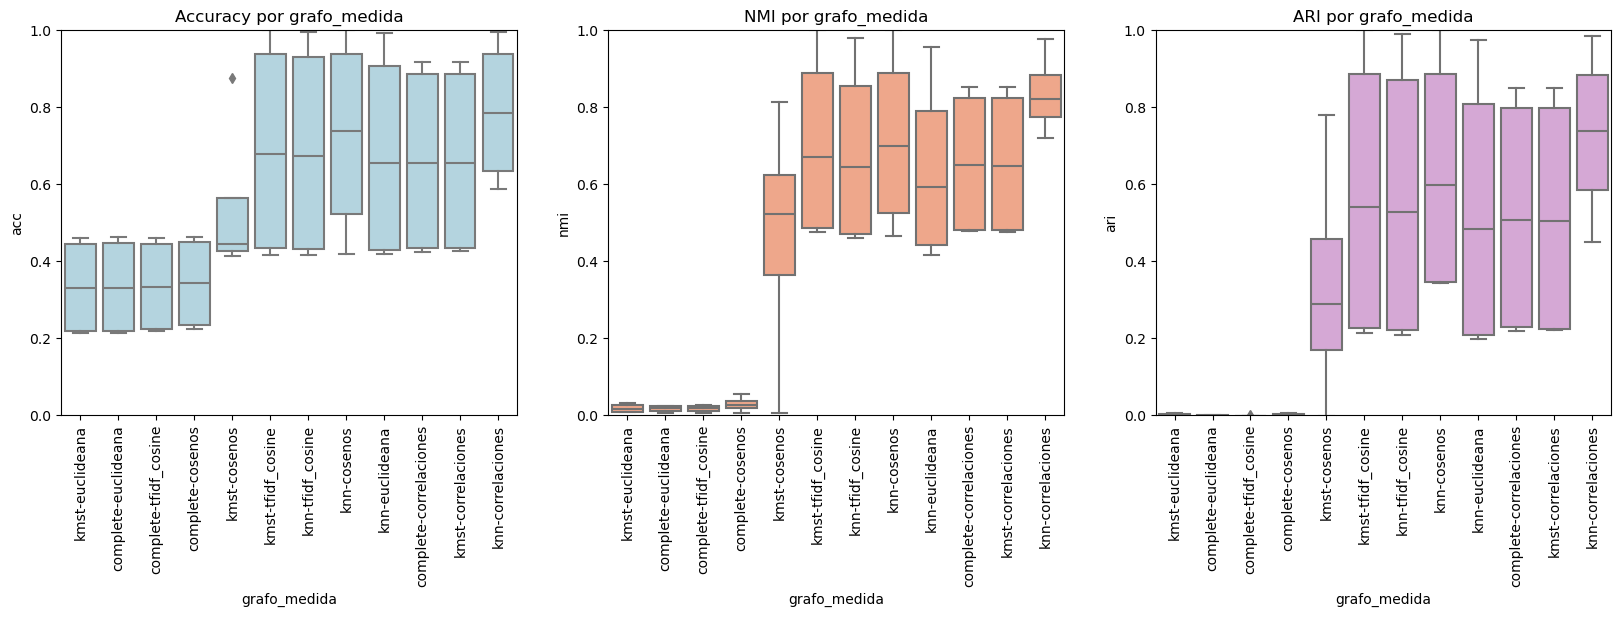

In [98]:
results_bet['grafo_medida'] = results_bet['grafo'] + '-' + results_bet['medida'] 
results_bet = results_bet.sort_values('acc')
box_plot_metricas(results_bet, "grafo_medida", True)